In [1]:
# needed libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import acf, pacf
from operator import itemgetter
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
plt.style.use("fivethirtyeight")

In [2]:
def set_time_index(df, timecolname):

    """This function sets the time col as index and makes sure it's a datetime object.

    :param df: full Dataframe
    :param timecolname: colname of the column that has time information in it
    :return: full Dataframe
    """
    # take the time column and convert it to a datetime object
    df[timecolname] = pd.to_datetime(df[timecolname])

    # set the index of the DF as the time Column
    df.set_index(timecolname, inplace = True)

    return df

def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [3]:
# import the needed data
df_bond = pd.read_excel("GovBondYields.xls",sheet_name="Rates",header=0)
df_bond = set_time_index(df_bond,"Date")
print(df_bond)


# series_ar2 = pd.read_csv('AR2_Series.csv', header = None, index_col = 0, squeeze = True, sep = ",")
# series_ar2 = series_ar2.transpose()

             3         6     12        24    36    60        84    120
Date                                                                  
1954-04-01  0.97  0.940464  0.96  1.209220  1.54  1.87  1.929210  2.29
1954-05-01  0.76  0.767847  0.85  1.183784  1.56  1.92  1.974341  2.37
1954-06-01  0.64  0.687447  0.82  1.174206  1.53  1.92  2.046101  2.38
1954-07-01  0.72  0.745219  0.84  1.141956  1.47  1.85  1.990559  2.30
1954-08-01  0.92  0.876895  0.88  1.130205  1.49  1.90  2.024843  2.36
...          ...       ...   ...       ...   ...   ...       ...   ...
2005-12-01  3.89  4.180000  4.35  4.400000  4.39  4.39  4.410000  4.47
2006-01-01  4.24  4.310000  4.45  4.400000  4.35  4.35  4.370000  4.42
2006-02-01  4.43  4.520000  4.68  4.670000  4.64  4.57  4.560000  4.57
2006-03-01  4.51  4.620000  4.77  4.730000  4.74  4.72  4.710000  4.72
2006-04-01  4.60  4.720000  4.90  4.890000  4.89  4.90  4.940000  4.99

[625 rows x 8 columns]


**Task (1):** Do interest rates of different maturities share little or strong co-movement. Hint: plot the interest rate data.

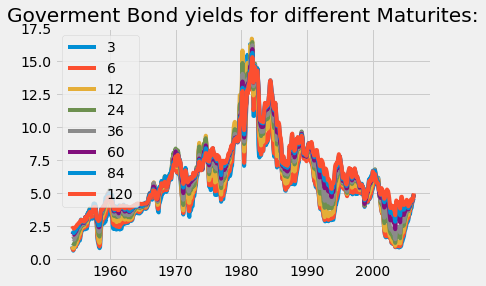

In [4]:
for column in df_bond.columns.values:
    plt.plot(df_bond[column], label = column)

plt.legend(loc="best")
plt.title("Goverment Bond yields for different Maturites:")
plt.show()

# Answer : Strong co Movement

**Task (2):** How large is the correlation between the 3-month and the 120-month interest rate?


In [5]:
#get correlation:

# correlation matrix
colname_3 = df_bond.columns[0]
# print(df_bond[colname_3])
colname_120 = df_bond.columns[7]
# print(df_bond[colname_120])
correlation = df_bond[colname_3].corr(df_bond[colname_120])
print(f"Correlation: {round(correlation,2)}")
print(df_bond.corr())

Correlation: 0.91
          3         6         12        24        36        60        84   \
3    1.000000  0.997633  0.991274  0.976153  0.962957  0.940936  0.924004   
6    0.997633  1.000000  0.996788  0.984552  0.972064  0.950377  0.933454   
12   0.991274  0.996788  1.000000  0.994109  0.984869  0.966853  0.952068   
24   0.976153  0.984552  0.994109  1.000000  0.997212  0.986764  0.976268   
36   0.962957  0.972064  0.984869  0.997212  1.000000  0.995542  0.988370   
60   0.940936  0.950377  0.966853  0.986764  0.995542  1.000000  0.997915   
84   0.924004  0.933454  0.952068  0.976268  0.988370  0.997915  1.000000   
120  0.907432  0.916364  0.936304  0.963444  0.979063  0.993314  0.997740   

          120  
3    0.907432  
6    0.916364  
12   0.936304  
24   0.963444  
36   0.979063  
60   0.993314  
84   0.997740  
120  1.000000  


**Task (4):** Use the PACF plot to advise which AR(p) model fits 3-month and 120-month government bond yields best. To solve the problem, write down which lags are significant for the 3- and the 120-month interest rate

In [13]:
# make time series stationary
# compute first order lag operator and remove na value :  Remove Trend
df_bond_diff = df_bond
    # .diff().dropna()
df_bond_diff = df_bond_diff[[colname_3,colname_120]]

ADF Statistic: -2.656063
p-value: 0.081955
ADF Statistic: -1.737744
p-value: 0.411778


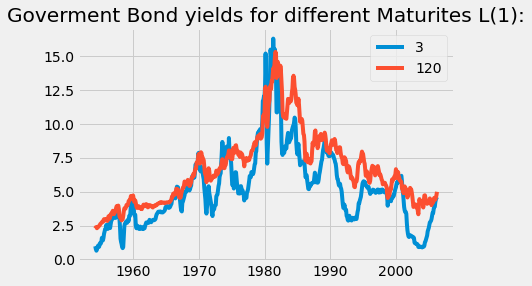

In [14]:
#check stationarity
perform_adf_test(df_bond_diff[colname_3])
perform_adf_test(df_bond_diff[colname_120])
for column in df_bond_diff.columns.values:
    plt.plot(df_bond_diff[column], label = column)

plt.legend(loc="best")
plt.title("Goverment Bond yields for different Maturites L(1):")
plt.show()

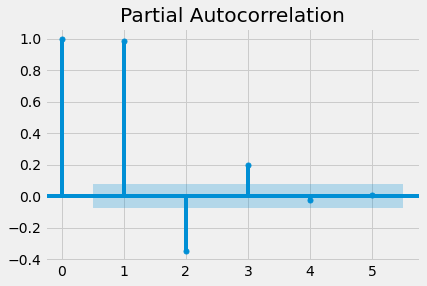

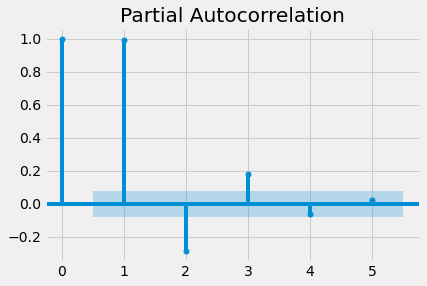

In [15]:
# compute and plot pacf value for Ar models
# pacf_vals_3,conf3 = pacf(df_bond_diff[colname_3],nlags = 5,alpha =0.05)
# print(pacf_vals_3)
# print(conf3)
pacf_plot_3 = plot_pacf(df_bond_diff[colname_3],lags = 5,alpha =0.05)
plt.show()

# Answer: Ar(2) process (Ar(6) as Alternative

# pacf_vals_120,conf120 = pacf(df_bond_diff[colname_120],nlags = 5,alpha =0.05)
# print(pacf_vals_120)
# print(conf120)
pacf_plot_120 = plot_pacf(df_bond_diff[colname_120],lags = 5,alpha =0.05)
plt.show()

# Answer: Ar(2) process

**Task (5):** Use the AIC criterium to advise which AR(p) model fits 3-month and 120-month government bond yields best. To solve the problem, write down the optimal AIC lag length for both interest rates.
**Task (6):** Use the BIC criterium to advise which AR(p) model fits 3-month and 120-month government bond yields best. To solve the problem, write down the optimal AIC lag length for both interest rates.

In [9]:
# define array
ar_orders = [1,2,3,4,5]
aics = []
bics = []

# define model
for order in ar_orders:

    model = ARMA(df_bond_diff[colname_120],order = (order,0))
    model = model.fit(maxlag = 5, method ="mle")
    aic =  model.aic
    bic = model.bic
    aics.append((order,aic))
    bics.append((order,bic))

print(aics)
print(bics)

order_opt = min(aics,key=itemgetter(1))
print(order_opt)

order_opt_= min(bics,key=itemgetter(1))
print(order_opt_)


print("finished")

c:\users\win10\pycharmprojects\elasticstack\venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\win10\pycharmprojects\elasticstack\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency infor

[(1, 129.67855298718655), (2, 97.14820760959242), (3, 95.06121984822039), (4, 96.44293917836444), (5, 92.29588723282359)]
[(1, 142.98700409229482), (2, 114.89280908307013), (3, 117.24197169006753), (4, 123.059841388581), (5, 123.3489398114096)]
(5, 92.29588723282359)
(2, 114.89280908307013)
finished


In [10]:
import statsmodels.tsa.ar_model
# print(df_bond_diff[colname_120])
data = np.array(df_bond_diff[colname_3])
# print(data)
model_new = statsmodels.tsa.ar_model.AR(data)
results = model_new.fit(maxlag = 5, method ="mle",ic = "aic")
print(results.k_ar)

c:\users\win10\pycharmprojects\elasticstack\venv\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_

2


c:\users\win10\pycharmprojects\elasticstack\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\win10\pycharmprojects\elasticstack\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\win10\pycharmprojects\elasticstack\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\win10\pycharmprojects\elasticstack\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AIC for AR(1): 719.1132205302613
AIC for AR(4): 695.7151941417926
AIC for AR(6): 654.9131373253733
AIC for AR(10): 643.3913387421221
BIC for AR(1): 732.4216716353695
BIC for AR(4): 722.3320963520092
BIC for AR(6): 690.4023402723287
BIC for AR(10): 696.6251431625552


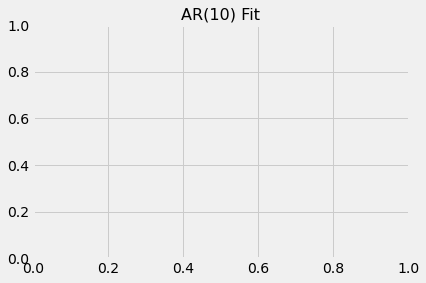

In [11]:
ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):

    #create AR(p) model
    ar_model = ARMA(df_bond_diff[colname_3], order=(ar_order,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

#AIC comparison
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))


#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))
